In [0]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-06-10 20:16:00--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-06-10 20:16:01--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb537066fdfd537b62b549d16c8.dl.dropboxusercontent.com/zip_download_get/AcxS_ZaE0SSi8bhY4MoDQhqcjcGDCDlzkc0dyiE83rLEZ1EBwGkbYgs9jf6lR0eueQs1vaQ6mphH1DjNog3rQup8S7ow4gDFV3h1tVkxDW-Xug [following]
--2020-06-10 20:16:02--  https://ucb537066fdfd537b62b549d16c8.dl.dropboxusercontent.com/zip_download_get/AcxS_ZaE0SSi8bhY4MoDQhqcjcGDCDlzkc0dyiE83rLEZ1EBwGkbYgs9jf6lR0eueQs1vaQ6mphH1DjNo

In [0]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [0]:
rm -rf 'Images' 'val_images'

In [0]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [0]:
import os, shutil
folders = os.listdir("Images")

In [0]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data   val_images


In [0]:
for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.9
for f in os.listdir("Images"):
    path = "Images/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size+1:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)

In [0]:
print("Training Data")
for f in folders:
    path = "Images/"+f
    print(f+ " "+str(len(os.listdir(path))))
   

print("\n Validation Data") 
for f in folders:
    path = "val_images/"+f
    print(f+ " "+str(len(os.listdir(path))))

Training Data
cats 182
humans 182
dogs 182
horses 182

 Validation Data
cats 20
humans 20
dogs 20
horses 20


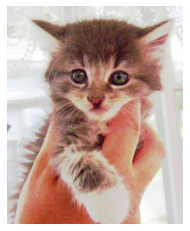

In [0]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

sample_path = "Images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

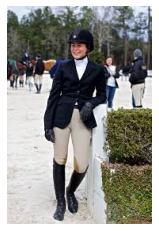

[[[0.84313726 0.89411765 0.91764706]
  [0.8509804  0.9019608  0.9254902 ]
  [0.8627451  0.9137255  0.9372549 ]
  ...
  [0.78039217 0.8117647  0.89411765]
  [0.90588236 0.9372549  1.        ]
  [0.85882354 0.89411765 0.9607843 ]]

 [[0.8784314  0.92941177 0.9529412 ]
  [0.8666667  0.91764706 0.9411765 ]
  [0.8509804  0.9019608  0.93333334]
  ...
  [0.7764706  0.80784315 0.88235295]
  [0.92941177 0.9647059  1.        ]
  [0.8980392  0.93333334 0.99215686]]

 [[0.84313726 0.89411765 0.9254902 ]
  [0.8509804  0.9019608  0.93333334]
  [0.85882354 0.9098039  0.9411765 ]
  ...
  [0.7294118  0.7647059  0.83137256]
  [0.94509804 0.98039216 1.        ]
  [0.9647059  1.         1.        ]]

 ...

 [[0.8745098  0.85882354 0.84705883]
  [0.89411765 0.8784314  0.8666667 ]
  [0.88235295 0.8666667  0.85490197]
  ...
  [0.45882353 0.3254902  0.21960784]
  [0.49019608 0.35686275 0.2509804 ]
  [0.54901963 0.41568628 0.31764707]]

 [[0.87058824 0.85490197 0.84313726]
  [0.8901961  0.8745098  0.8627451 ]


In [0]:
sample_path = "Images/humans/rider-103.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()
print(image.img_to_array(img)/255.0)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_gen.flow_from_directory(
    "Images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 728 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [0]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 224, 224, 3)
(32, 4)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,output=fc2)

model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
for ix in range(len(model.layers)):
    model_new.layers[ix].trainable = False

# for ix in range(169):
#     model_new.layers[ix].trainable = False
    
model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [0]:
history = model_new.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 5,
    validation_data = val_generator,
    validation_steps = 4   
)

Epoch 1/5
5/5 [==============================] - 59s 12s/step - loss: 0.3527 - accuracy: 0.8687 - val_loss: 0.3080 - val_accuracy: 0.9196
Epoch 2/5
5/5 [==============================] - 52s 10s/step - loss: 0.5243 - accuracy: 0.8625 - val_loss: 0.0611 - val_accuracy: 0.9196
Epoch 3/5
5/5 [==============================] - 52s 10s/step - loss: 0.4269 - accuracy: 0.8813 - val_loss: 0.4784 - val_accuracy: 0.9271
Epoch 4/5
5/5 [==============================] - 49s 10s/step - loss: 0.3112 - accuracy: 0.9211 - val_loss: 0.1788 - val_accuracy: 0.9286
Epoch 5/5
5/5 [==============================] - 55s 11s/step - loss: 0.1422 - accuracy: 0.9375 - val_loss: 0.1652 - val_accuracy: 0.9286


In [0]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

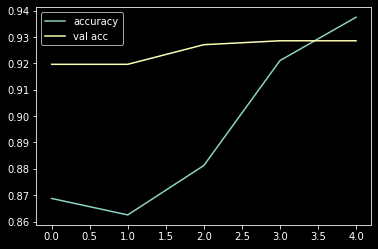

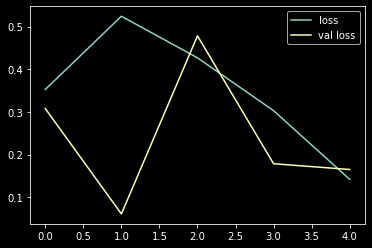

In [0]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.legend()
plt.show()

plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

## Prediction Time

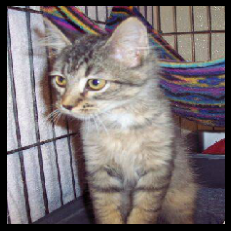

['cats', 'dogs', 'horses', 'humans']
Predicted:  cats


In [0]:
import keras
sample_path = "Images/cats/cat.2.jpg"
img = image.load_img(sample_path,target_size=(224,224))
x = image.img_to_array(img)

x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

plt.imshow(img)
plt.axis("off")
plt.show()

# By default kears stores all class names by folder names and in sorted order

classes.sort()
print(classes)
preds = model_new.predict(x)
#pred_class =keras.np_utils.probas_to_classes(preds)
pred_class = classes[np.argmax(preds)]
print("Predicted: ",pred_class)




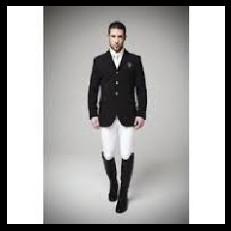

Predicted:  humans


In [0]:
sample_path = "Images/humans/rider-110.jpg"
img = image.load_img(sample_path,target_size=(224,224))
x = image.img_to_array(img)

x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

plt.imshow(img)
plt.axis("off")
plt.show()

#print(image.img_to_array(img)/255.0)

preds = model_new.predict(x)
pred_class =classes[np.argmax(preds)]
print("Predicted: ",pred_class)